<a href="https://colab.research.google.com/github/Bertaalcolea/Collagen_studies/blob/main/dECM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re

# Cargar archivo
df_raw = pd.read_excel("/content/dECM1_Berta (2).xlsx", header=None)

# 1) Detectar filas que marcan tiempos
mask_time = df_raw[0].astype(str).str.contains(r"^350\s*-\s*Time", na=False)
time_rows = df_raw.index[mask_time].tolist()

# 2) Extraer los tiempos en minutos desde el texto
def extraer_minutos(txt):
    m = re.search(r"\((\d+):(\d+):(\d+)\)", txt)
    if m:
        h, m_, s = map(int, m.groups())
        return h*60 + m_ + s/60
    return np.nan

tiempos_min = [extraer_minutos(df_raw.loc[r, 0]) for r in time_rows]

# 3) Extraer la cuadrícula completa A–H y 1–12 para CADA tiempo
registros = []

for i, start in enumerate(time_rows):
    t_min = tiempos_min[i]

    # La cuadrícula empieza SIEMPRE 5 filas después
    grid_start = start + 5

    # Filas A–H (8 filas)
    for fila in range(8):
        row_idx = grid_start + fila
        row_letter = df_raw.loc[row_idx, 1]

        if not isinstance(row_letter, str):
            continue

        for col in range(1, 13):  # columnas 1 a 12
            od = df_raw.loc[row_idx, col+1]  # +1 por desplazamiento en tu archivo
            if pd.isna(od):
                continue
            well = f"{row_letter}{col}"
            registros.append([well, t_min, od])

df_long = pd.DataFrame(registros, columns=["well", "time_min", "OD"])


In [2]:
print("Filas extraídas:", len(df_long))
print(df_long.head())
print(df_long.tail())

df_long["time_min"].unique()  # debería devolver ~120 tiempos


Filas extraídas: 4359
  well  time_min     OD
0   B4       0.2  0.169
1   B5       0.2  0.167
2   B6       0.2  0.169
3   C1       0.2  0.182
4   C2       0.2  0.175
     well  time_min     OD
4354   H2     120.2  0.504
4355   H3     120.2  0.513
4356   H4     120.2  0.379
4357   H5     120.2  0.484
4358   H6     120.2  0.426


array([  0.2,   1.2,   2.2,   3.2,   4.2,   5.2,   6.2,   7.2,   8.2,
         9.2,  10.2,  11.2,  12.2,  13.2,  14.2,  15.2,  16.2,  17.2,
        18.2,  19.2,  20.2,  21.2,  22.2,  23.2,  24.2,  25.2,  26.2,
        27.2,  28.2,  29.2,  30.2,  31.2,  32.2,  33.2,  34.2,  35.2,
        36.2,  37.2,  38.2,  39.2,  40.2,  41.2,  42.2,  43.2,  44.2,
        45.2,  46.2,  47.2,  48.2,  49.2,  50.2,  51.2,  52.2,  53.2,
        54.2,  55.2,  56.2,  57.2,  58.2,  59.2,  60.2,  61.2,  62.2,
        63.2,  64.2,  65.2,  66.2,  67.2,  68.2,  69.2,  70.2,  71.2,
        72.2,  73.2,  74.2,  75.2,  76.2,  77.2,  78.2,  79.2,  80.2,
        81.2,  82.2,  83.2,  84.2,  85.2,  86.2,  87.2,  88.2,  89.2,
        90.2,  91.2,  92.2,  93.2,  94.2,  95.2,  96.2,  97.2,  98.2,
        99.2, 100.2, 101.2, 102.2, 103.2, 104.2, 105.2, 106.2, 107.2,
       108.2, 109.2, 110.2, 111.2, 112.2, 113.2, 114.2, 115.2, 116.2,
       117.2, 118.2, 119.2, 120.2])

In [3]:
well_cond_map = {

    # --------------------------
    # CONTROL (fila B)
    # --------------------------
    "B1": "Control no pH",
    "B2": "Control no pH",
    "B3": "Control no pH",
    "B4": "Control pH7",
    "B5": "Control pH7",
    "B6": "Control pH7",

    # --------------------------
    # BOVINO (fila C)
    # --------------------------
    "C1": "Bov no pH",
    "C2": "Bov no pH",
    "C3": "Bov no pH",
    "C4": "Bov pH7",
    "C5": "Bov pH7",
    "C6": "Bov pH7",

    # --------------------------
    # RAT (fila D)
    # --------------------------
    "D1": "Rat no pH",
    "D2": "Rat no pH",
    "D3": "Rat no pH",
    "D4": "Rat pH7",
    "D5": "Rat pH7",
    "D6": "Rat pH7",

    # --------------------------
    # NO PAA 48h (fila E)
    # --------------------------
    "E1": "No PAA 48h no pH",
    "E2": "No PAA 48h no pH",
    "E3": "No PAA 48h no pH",
    "E4": "No PAA 48h pH7",
    "E5": "No PAA 48h pH7",
    "E6": "No PAA 48h pH7",

    # --------------------------
    # PAA 48h (fila F)
    # --------------------------
    "F1": "PAA 48h no pH",
    "F2": "PAA 48h no pH",
    "F3": "PAA 48h no pH",
    "F4": "PAA 48h pH7",
    "F5": "PAA 48h pH7",
    "F6": "PAA 48h pH7",

    # --------------------------
    # NO PAA 24h (fila G)
    # --------------------------
    "G1": "No PAA 24h no pH",
    "G2": "No PAA 24h no pH",
    "G3": "No PAA 24h no pH",
    "G4": "No PAA 24h pH7",
    "G5": "No PAA 24h pH7",
    "G6": "No PAA 24h pH7",

    # --------------------------
    # PAA 24h (fila H)
    # --------------------------
    "H1": "PAA 24h no pH",
    "H2": "PAA 24h no pH",
    "H3": "PAA 24h no pH",
    "H4": "PAA 24h pH7",
    "H5": "PAA 24h pH7",
    "H6": "PAA 24h pH7",
}


In [4]:
df_long["cond"] = df_long["well"].map(well_cond_map)
df_long = df_long.dropna(subset=["cond"])


In [5]:
summary_raw = (
    df_long.groupby(["time_min", "cond"])
    .agg(OD_mean=("OD","mean"),
         OD_sd=("OD","std"),
         n=("OD","count"))
    .reset_index()
)

print(summary_raw.head())
print(summary_raw["cond"].unique())


   time_min              cond   OD_mean     OD_sd  n
0       0.2         Bov no pH  0.179333  0.003786  3
1       0.2           Bov pH7  0.195000  0.008888  3
2       0.2       Control pH7  0.168333  0.001155  3
3       0.2  No PAA 24h no pH  0.385333  0.009018  3
4       0.2    No PAA 24h pH7  0.274000  0.017578  3
['Bov no pH' 'Bov pH7' 'Control pH7' 'No PAA 24h no pH' 'No PAA 24h pH7'
 'No PAA 48h no pH' 'No PAA 48h pH7' 'PAA 24h no pH' 'PAA 24h pH7'
 'PAA 48h no pH' 'PAA 48h pH7' 'Rat no pH' 'Rat pH7']


In [6]:
orden_leyenda = [
    "Rat no pH", "Rat pH7",
    "Bov no pH", "Bov pH7",
    "PAA 24h no pH", "PAA 24h pH7",
    "No PAA 24h no pH", "No PAA 24h pH7",
    "PAA 48h no pH", "PAA 48h pH7",
    "No PAA 48h no pH", "No PAA 48h pH7",
    "Control"
]


In [7]:
import matplotlib.pyplot as plt


In [8]:
colores = {
    "Rat no pH": "tab:blue",
    "Rat pH7": "tab:cyan",
    "Bov no pH": "tab:orange",
    "Bov pH7": "tab:red",
    "PAA 24h no pH": "tab:green",
    "PAA 24h pH7": "tab:olive",
    "No PAA 24h no pH": "tab:pink",
    "No PAA 24h pH7": "tab:brown",
    "PAA 48h no pH": "tab:purple",
    "PAA 48h pH7": "gray",          # aquí quité el 'tab:magenta'
    "No PAA 48h no pH": "black",
    "No PAA 48h pH7": "C9",         # otro color del ciclo por si quieres
    "Control": "C7"
}


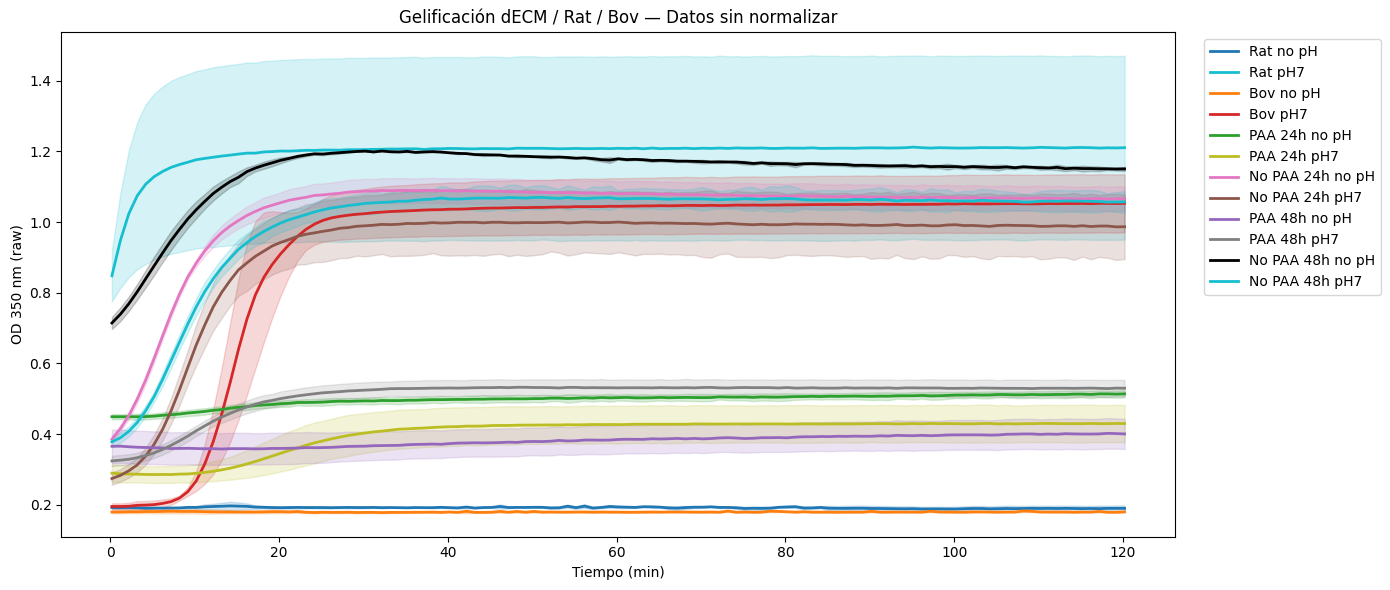

In [9]:
plt.figure(figsize=(14,6))

for cond in orden_leyenda:
    dfc = summary_raw[summary_raw["cond"] == cond]
    if dfc.empty:
        continue  # por si alguna condición no existe

    plt.plot(
        dfc["time_min"],
        dfc["OD_mean"],
        color=colores[cond],
        label=cond,
        linewidth=2
    )
    plt.fill_between(
        dfc["time_min"],
        dfc["OD_mean"] - dfc["OD_sd"],
        dfc["OD_mean"] + dfc["OD_sd"],
        color=colores[cond],
        alpha=0.18
    )

plt.title("Gelificación dECM / Rat / Bov — Datos sin normalizar")
plt.xlabel("Tiempo (min)")
plt.ylabel("OD 350 nm (raw)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [10]:
df_long["cond"] = df_long["well"].map(well_cond_map)
df_long = df_long.dropna(subset=["cond"])


In [11]:
summary_raw = (
    df_long.groupby(["time_min", "cond"])
    .agg(
        OD_mean=("OD", "mean"),
        OD_sd=("OD", "std"),
        n=("OD", "count")
    )
    .reset_index()
)


In [12]:
mask_ph7 = summary_raw["cond"].str.contains("pH7") | (summary_raw["cond"] == "Control")
summary_ph7 = summary_raw[mask_ph7].copy()

summary_ph7["cond_simple"] = summary_ph7["cond"].str.replace(" pH7", "", regex=False)


In [13]:
colores_simple = {
    # Rat / Bov
    "Rat": "#1f77b4",       # azul
    "Bov": "#800020",       # granate

    # PAA (naranja visible)
    "PAA 24h": "#ffb347",   # naranja claro (no beige)
    "PAA 48h": "#ff6600",   # naranja fuerte

    # No PAA (verde)
    "No PAA 24h": "#a1d99b",  # verde claro
    "No PAA 48h": "#238b45",  # verde fuerte

    # Control
    "Control": "black"
}


In [14]:
orden_leyenda_simple = [
    "Rat",
    "Bov",
    "PAA 24h",
    "No PAA 24h",
    "PAA 48h",
    "No PAA 48h",
    "Control"
]


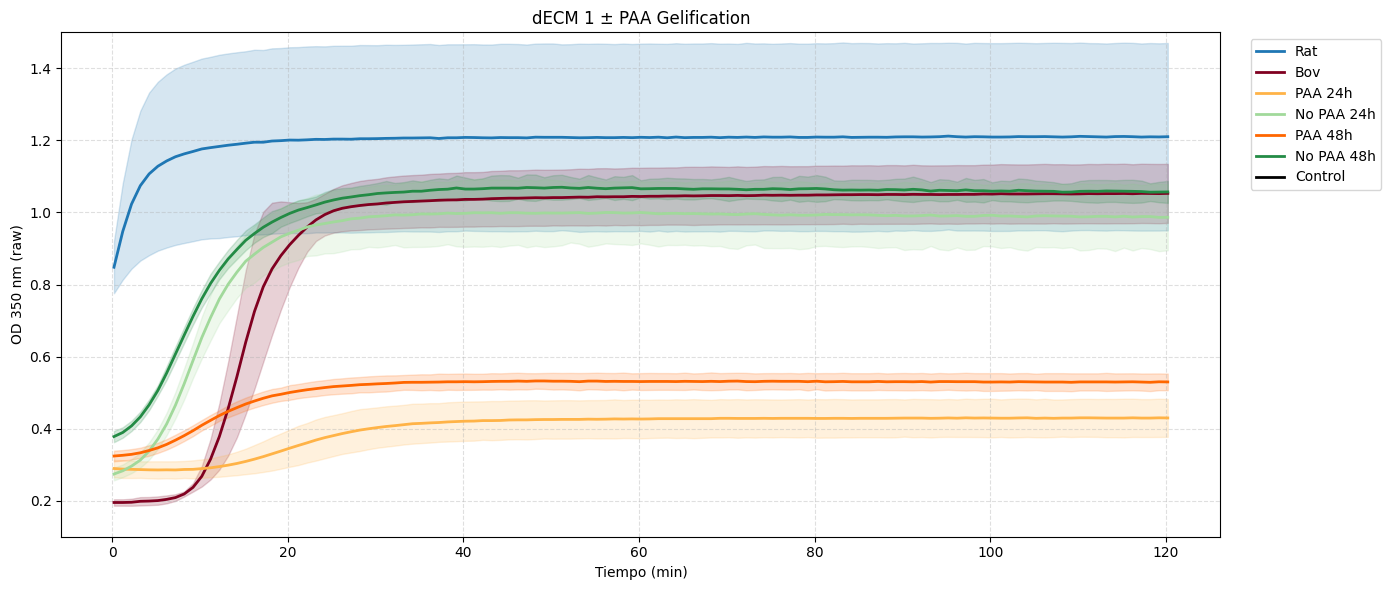

In [15]:
plt.figure(figsize=(14,6))

for cond in orden_leyenda_simple:
    dfc = summary_ph7[summary_ph7["cond_simple"] == cond]
    if dfc.empty:
        continue

    plt.plot(
        dfc["time_min"],
        dfc["OD_mean"],
        color=colores_simple[cond],
        label=cond,
        linewidth=2
    )
    plt.fill_between(
        dfc["time_min"],
        dfc["OD_mean"] - dfc["OD_sd"],
        dfc["OD_mean"] + dfc["OD_sd"],
        color=colores_simple[cond],
        alpha=0.18
    )

plt.title("dECM 1 ± PAA Gelification")
plt.xlabel("Tiempo (min)")
plt.ylabel("OD 350 nm (raw)")
plt.ylim(0.1, 1.5)
plt.grid(True, linestyle="--", alpha=0.4)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


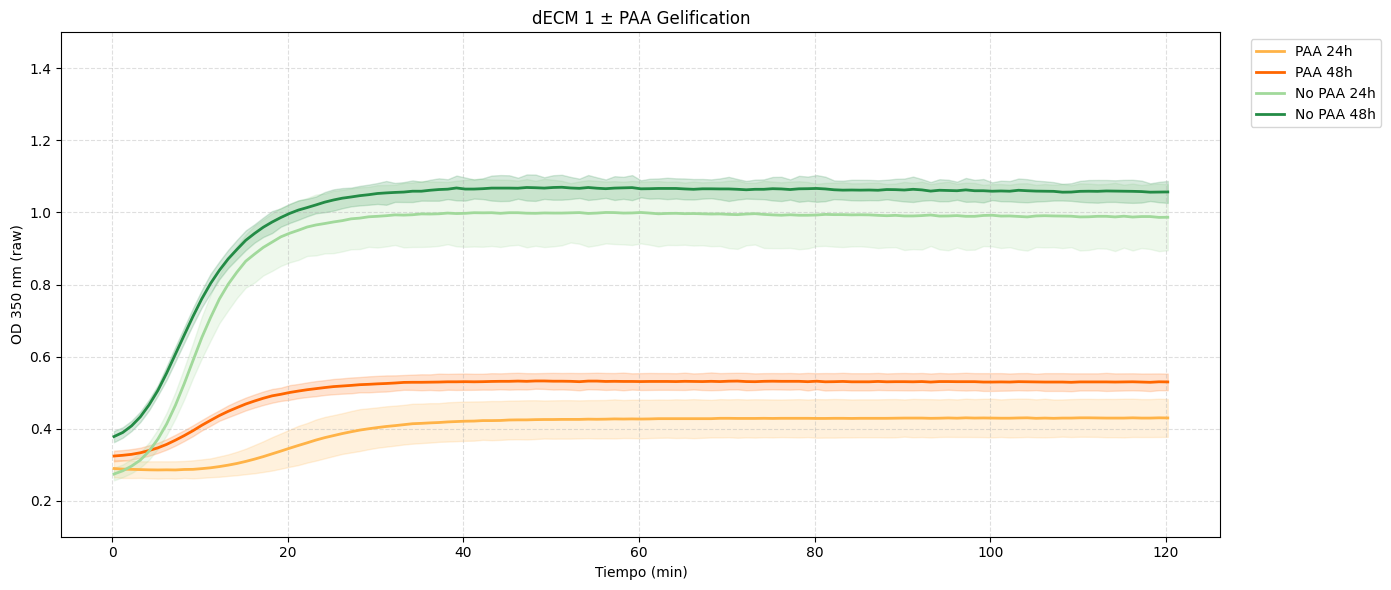

In [21]:
orden_leyenda_paa = [
    "PAA 24h",
    "PAA 48h",
    "No PAA 24h",
    "No PAA 48h",
]

plt.figure(figsize=(14,6))

for cond in orden_leyenda_paa:
    dfc = summary_ph7[summary_ph7["cond_simple"] == cond]
    if dfc.empty:
        continue

    plt.plot(
        dfc["time_min"],
        dfc["OD_mean"],
        color=colores_simple[cond],
        label=cond,
        linewidth=2
    )
    plt.fill_between(
        dfc["time_min"],
        dfc["OD_mean"] - dfc["OD_sd"],
        dfc["OD_mean"] + dfc["OD_sd"],
        color=colores_simple[cond],
        alpha=0.18
    )

plt.title("dECM 1 ± PAA Gelification")
plt.xlabel("Tiempo (min)")
plt.ylabel("OD 350 nm (raw)")
plt.ylim(0.1, 1.5)
plt.grid(True, linestyle="--", alpha=0.4)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


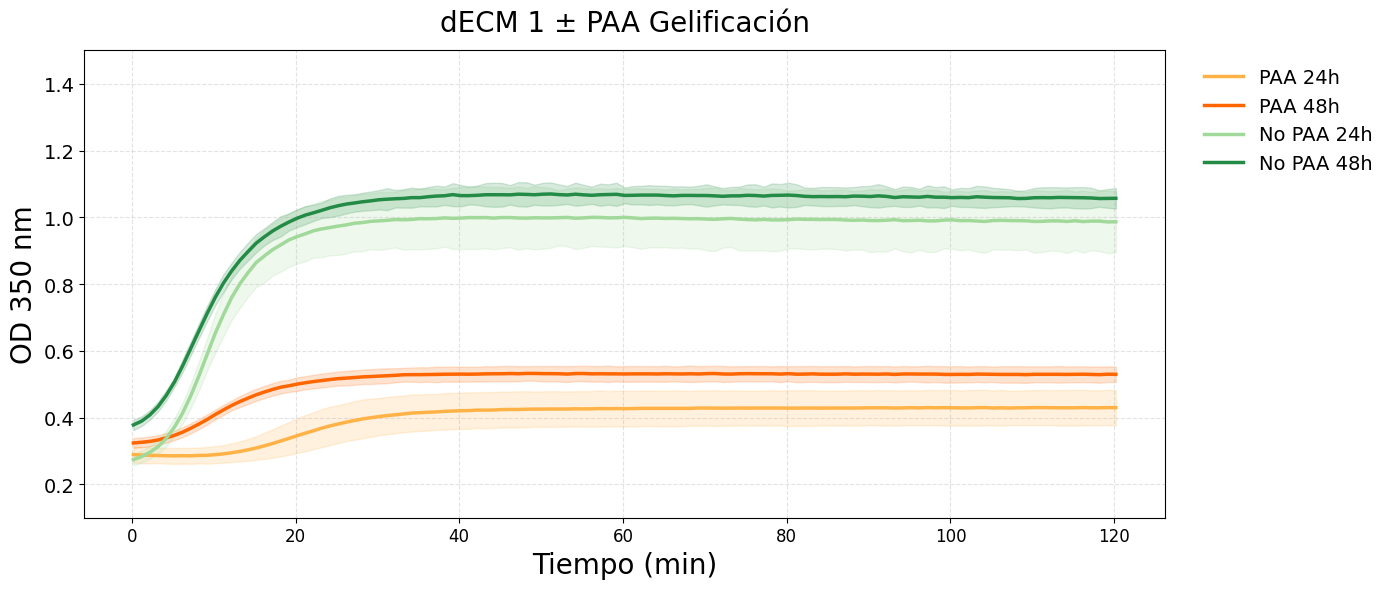

In [23]:
plt.figure(figsize=(14,6))

for cond in orden_leyenda_paa:
    dfc = summary_ph7[summary_ph7["cond_simple"] == cond]
    if dfc.empty:
        continue

    dfc = dfc.sort_values("time_min")

    plt.plot(
        dfc["time_min"],
        dfc["OD_mean"],
        color=colores_simple[cond],
        label=cond,
        linewidth=2.5   # un pelín más elegante, como en velocity
    )
    plt.fill_between(
        dfc["time_min"],
        dfc["OD_mean"] - dfc["OD_sd"],
        dfc["OD_mean"] + dfc["OD_sd"],
        color=colores_simple[cond],
        alpha=0.18
    )

# ----- Textos (MISMO TAMAÑO QUE VELOCITY) -----
plt.title("dECM 1 ± PAA Gelificación", fontsize=20, pad=14)
plt.xlabel("Tiempo (min)", fontsize=20)
plt.ylabel("OD 350 nm", fontsize=20)

# ----- Límites -----
plt.ylim(0.1, 1.5)

# ----- Ticks -----
plt.tick_params(axis="y", labelsize=14)
plt.tick_params(axis="x", labelsize=12)

# ----- Cuadrícula -----
plt.grid(True, linestyle="--", alpha=0.35)

# ----- Leyenda -----
plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    fontsize=14,
    frameon=False
)

plt.tight_layout()
plt.show()


In [16]:
# --- Normalización por pozo ---

df_norm = df_long.copy()

norm_values = (
    df_norm.groupby("well")["OD"]
    .agg(["min", "max"])
    .rename(columns={"min": "OD_min", "max": "OD_max"})
)

df_norm = df_norm.merge(norm_values, on="well")
df_norm["OD_norm"] = (df_norm["OD"] - df_norm["OD_min"]) / (df_norm["OD_max"] - df_norm["OD_min"])
df_norm["OD_norm"] = df_norm["OD_norm"].clip(0, 1)


In [17]:
# df_long viene del parsing del Excel (well, time_min, time_str, OD)

# 1) baseline y plateau por well
stats_well = (
    df_long
    .groupby("well")
    .agg(
        baseline=("OD", lambda s: s.iloc[0:3].mean()),      # media primeras 3 medidas
        plateau =("OD", lambda s: s.iloc[-10:].mean())      # media últimas 10
    )
    .reset_index()
)

# 2) crear OD normalizado por well
df_norm = (
    df_long
    .merge(stats_well, on="well")
    .assign(
        OD_norm=lambda d: (d["OD"] - d["baseline"]) / (d["plateau"] - d["baseline"])
    )
)

print(df_norm.head())
print(df_norm.columns)


  well  time_min     OD         cond  baseline  plateau       OD_norm
0   B4       0.2  0.169  Control pH7  0.169000   0.1690           NaN
1   B5       0.2  0.167  Control pH7  0.167000   0.1670           NaN
2   B6       0.2  0.169  Control pH7  0.169000   0.1690           NaN
3   C1       0.2  0.182    Bov no pH  0.181667   0.1805 -2.857143e-01
4   C2       0.2  0.175    Bov no pH  0.175000   0.1794  6.308085e-15
Index(['well', 'time_min', 'OD', 'cond', 'baseline', 'plateau', 'OD_norm'], dtype='object')


In [18]:
summary_norm = (
    df_norm
    .groupby(["time_min", "cond"])
    .agg(
        OD_mean=("OD_norm", "mean"),
        OD_sd  =("OD_norm", "std"),
        n      =("OD_norm", "count")
    )
    .reset_index()
)

print("shape summary_norm:", summary_norm.shape)
print("conds en summary_norm:", summary_norm["cond"].unique())
summary_norm.head()


shape summary_norm: (1453, 5)
conds en summary_norm: ['Bov no pH' 'Bov pH7' 'Control pH7' 'No PAA 24h no pH' 'No PAA 24h pH7'
 'No PAA 48h no pH' 'No PAA 48h pH7' 'PAA 24h no pH' 'PAA 24h pH7'
 'PAA 48h no pH' 'PAA 48h pH7' 'Rat no pH' 'Rat pH7']


,time_min,cond,OD_mean,OD_sd,n
0,0.2,Bov no pH,-0.011905,0.268055,3
1,0.2,Bov pH7,-0.000240,0.000416,3
2,0.2,Control pH7,NaN,NaN,0
3,0.2,No PAA 24h no pH,-0.049678,0.004104,3
4,0.2,No PAA 24h pH7,-0.014744,0.001073,3


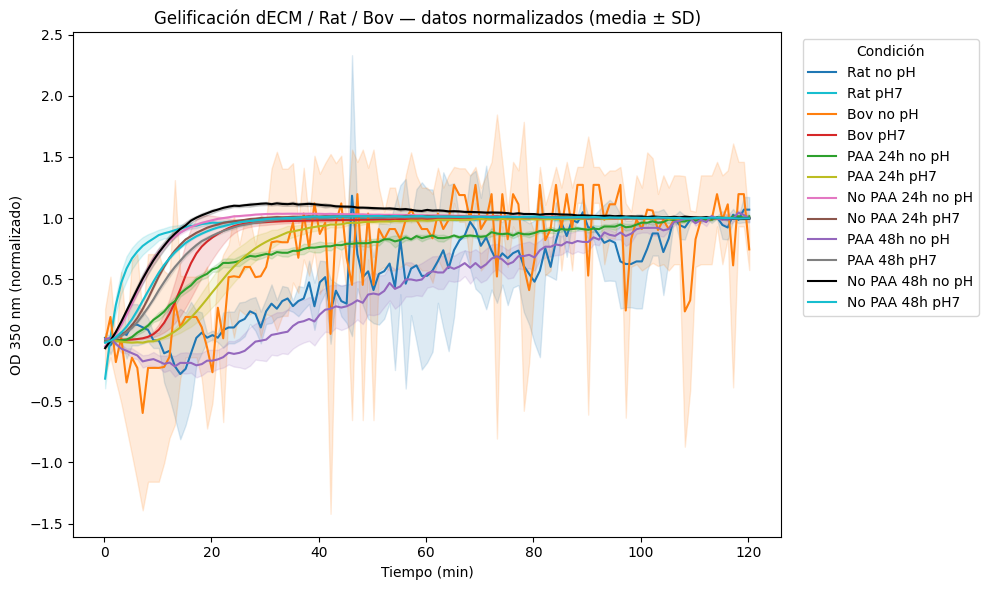

In [19]:
plt.figure(figsize=(10, 6))

for cond in orden_leyenda:
    sub = summary_norm[summary_norm["cond"] == cond]
    if sub.empty:
        continue

    color = colores.get(cond, "grey")

    # curva media normalizada
    plt.plot(
        sub["time_min"],
        sub["OD_mean"],
        label=cond,
        color=color
    )

    # banda de ±SD
    plt.fill_between(
        sub["time_min"],
        sub["OD_mean"] - sub["OD_sd"],
        sub["OD_mean"] + sub["OD_sd"],
        color=color,
        alpha=0.15
    )

plt.xlabel("Tiempo (min)")
plt.ylabel("OD 350 nm (normalizado)")
plt.title("Gelificación dECM / Rat / Bov — datos normalizados (media ± SD)")
plt.legend(title="Condición", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [20]:
# =====================================================
# 1. Filtrar sólo las condiciones con pH ajustado (pH7)
# =====================================================

summary_ph7 = summary_raw[summary_raw["cond"].str.contains("pH7")].copy()

# Crear cond_simple quitando el " pH7"
summary_ph7["cond_simple"] = summary_ph7["cond"].str.replace(" pH7", "", regex=False)

print("Condiciones incluidas (pH7):", summary_ph7["cond_simple"].unique())


# =====================================================
# 2. Encontrar el tiempo final
# =====================================================

end_time = summary_ph7["time_min"].max()
print("Último tiempo disponible:", end_time)


# =====================================================
# 3. Resumen OD al tiempo final
# =====================================================

end_summary = (
    summary_ph7[summary_ph7["time_min"] == end_time]
    .groupby("cond_simple")[["OD_mean", "OD_sd"]]
    .first()
    .sort_values("OD_mean", ascending=False)
)

print("\n=== OD FINAL POR CONDICIÓN (SOLO pH AJUSTADO) ===\n")
print(end_summary)


Condiciones incluidas (pH7): ['Bov' 'Control' 'No PAA 24h' 'No PAA 48h' 'PAA 24h' 'PAA 48h' 'Rat']
Último tiempo disponible: 120.2

=== OD FINAL POR CONDICIÓN (SOLO pH AJUSTADO) ===

              OD_mean     OD_sd
cond_simple                    
Rat          1.210333  0.260051
No PAA 48h   1.057000  0.030447
Bov          1.053000  0.081902
No PAA 24h   0.986667  0.091468
PAA 48h      0.529667  0.023180
PAA 24h      0.429667  0.052596
